In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator
import numpy as np
'''
!pip install PyQt5
import matplotlib
matplotlib.rcParams['backend'] = 'TkAgg'
%matplotlib qt
'''
import matplotlib.pyplot as plt
import sys
import os
import shutil
import math
from IPython.display import Image as IPImage
from IPython.display import display_jpeg
import glob
import cv2
import re



In [2]:
#店側の注文入力.(コードエディタ下の標準入力から注文をローマ字か数字で入力してください.)

order_list=[]
cnt=0
order_0=0
print('5件までの注文を受け付けます')
print("\n")
while(1):
  if cnt==5:
    break

  print('客: 注文する寿司を入力してください(名前[ローマ字]でも、数字でも可)')
  print('0: 注文を終了 1:anago 2:buri 3:ebi 4:hotate 5:ika 6:ikura 7:maguro 8:sa-monn 9:negitoro ')
  print('10: tamago 11: yaki_sa-monn')

  print('ローマ字or数字入力→ ', end='')
  order=input()
  if order=='0':
    break

  while(1):
    if order=='0':
        order_0=1
        break
    elif order!='anago'and order!='buri'and order!='ebi'and order!='hotate'and order!='ika'and order!='ikura'and order!='maguro'and order!='sa-monn'and order!='ebi'and\
      order!='hotate'and order!='ika'and order!='ikura'and order!='maguro'and order!='sa-monn'and order!='negitoro'\
      and order!='tamago'and order!='yaki_sa-monn' and order!='1'and order!='2'and order!='3' and order!='4' and order!='5'and order!='6'and order!='7'and order!='8'and order!='9'and order!='10'and order!='11':
      print('客: 入力された商品は存在しません')
      print('客: 入力し直してください')
      print('入力→ ', end='')
      order=input()
    else:
      cnt+=1
      break

  if order_0==1:
    break

  #
  if order=='1':
    order='anago'
  elif order=='2':
    order='buri'
  elif order=='3':
    order='ebi'
  elif order=='4':
    order='hotate'
  elif order=='5':
    order='ika'
  elif order=='6':
    order='ikura'
  elif order=='7':
    order='maguro'
  elif order=='8':
    order='sa-monn'
  elif order=='9':
    order='negitoro'
  elif order=='10':
    order='tamago'
  elif order=='11':
    order='yaki_sa-monn'

  order_list.append(order)
  print(order_list)
  print("\n")

save_order_list=order_list.copy()
print("\n")
print('客: 注文は以下の通りです. 商品の到着までもうしばらくお待ちください.')
print(order_list)

5件までの注文を受け付けます


客: 注文する寿司を入力してください(名前[ローマ字]でも、数字でも可)
0: 注文を終了 1:anago 2:buri 3:ebi 4:hotate 5:ika 6:ikura 7:maguro 8:sa-monn 9:negitoro 
10: tamago 11: yaki_sa-monn
ローマ字or数字入力→ ebi
['ebi']


客: 注文する寿司を入力してください(名前[ローマ字]でも、数字でも可)
0: 注文を終了 1:anago 2:buri 3:ebi 4:hotate 5:ika 6:ikura 7:maguro 8:sa-monn 9:negitoro 
10: tamago 11: yaki_sa-monn
ローマ字or数字入力→ 9
['ebi', 'negitoro']


客: 注文する寿司を入力してください(名前[ローマ字]でも、数字でも可)
0: 注文を終了 1:anago 2:buri 3:ebi 4:hotate 5:ika 6:ikura 7:maguro 8:sa-monn 9:negitoro 
10: tamago 11: yaki_sa-monn
ローマ字or数字入力→ 7
['ebi', 'negitoro', 'maguro']


客: 注文する寿司を入力してください(名前[ローマ字]でも、数字でも可)
0: 注文を終了 1:anago 2:buri 3:ebi 4:hotate 5:ika 6:ikura 7:maguro 8:sa-monn 9:negitoro 
10: tamago 11: yaki_sa-monn
ローマ字or数字入力→ 1
['ebi', 'negitoro', 'maguro', 'anago']


客: 注文する寿司を入力してください(名前[ローマ字]でも、数字でも可)
0: 注文を終了 1:anago 2:buri 3:ebi 4:hotate 5:ika 6:ikura 7:maguro 8:sa-monn 9:negitoro 
10: tamago 11: yaki_sa-monn
ローマ字or数字入力→ hotate
['ebi', 'negitoro', 'maguro', 'anago', 'hotate']




客: 

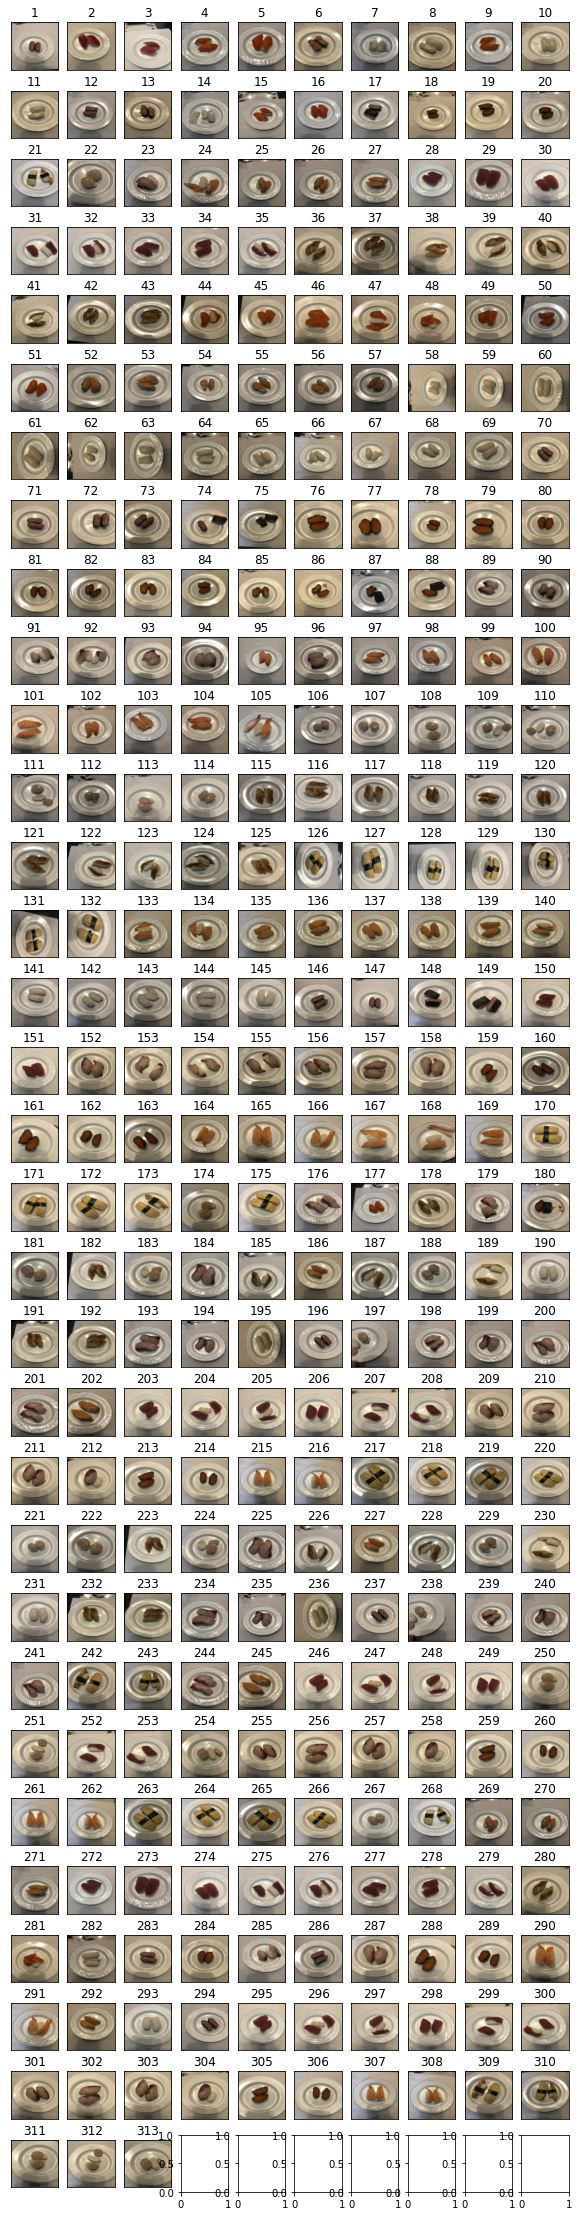

In [3]:
#写真の表示(15秒ほど時間がかかります.)

from skimage.io import imread, imsave
from skimage.transform import resize
from skimage.color import rgb2gray, gray2rgb

#appearance_num=20 #表示する数
row=32 # 行数
col=10 # 列数
fig, ax = plt.subplots(nrows=row, ncols=col,figsize=(10,40))



path='folder/*.jpg'
flist = glob.glob(path)

#print(len(flist))
#random_arr = np.random.randint(1,len(flist), appearance_num)
#random_arr=str(random_arr)
#print(random_arr)

#fig.suptitle("susi_choice", fontsize=20, color='black')
for i,num in enumerate(range(1,len(flist)+1)):
  r=i//col
  c=i%col
  ax[r,c].set_title(str(num), fontsize=12, color='black')
  ax[r,c].axes.xaxis.set_visible(False) # X軸を非表示に
  ax[r,c].axes.yaxis.set_visible(False) # Y軸を非表示に
  im = imread('folder/'+ str(num) +'.jpg')  
  ax[r,c].imshow(im) # 画像を表示





In [4]:
#店側の寿司画像の入力(コードエディタ下の標準入力から上の寿司画像に対応する数字を入力してください.)
#使いづらくてすいません

from skimage.io import imread, imsave
from PIL import Image
from keras.models import load_model

IMAGE_SIZE = 128
BATCH_SIZE = 8

IMAGE_SIZE_TEST = 128
BATCH_SIZE_TEST = 1

backup_path_kind = os.path.join('model_kind', 'cp-2.ckpt')
model_kind = load_model(backup_path_kind)
backup_path_collapse = os.path.join('model_collapse', 'cp-2.ckpt')
model_collapse = load_model(backup_path_collapse)


test_data_gen_test = ImageDataGenerator(rescale=1./255)
serve_list=[]

test_dir='./test/ml'
print('調理者: お客さんからの注文は以下の通りです.')
print(order_list)
print('調理者: 上の画像に対応する数字を入力し、1皿(枚)ずつ寿司(画像)を選んでください.')
while(1): #注文数だけ行う
  if len(order_list)==0:
    break
  while(1): #注目する一つの寿司画像に対して、適切な寿司を出品できるまで行う
    while(1): #正しい数字(寿司写真)が入力されるまで行う
      print('\n')
      print('残りの注文リスト')
      print(order_list)
      print('数字入力→ ', end='')  
      serve=input()
      serve=int(serve)

      if serve>=1 and serve<=len(flist):
        break
      else:
        print('調理者: 1～{0}までの数字を入力してください.'.format(len(flist)))

    im = Image.open('folder/'+ str(serve) +'.jpg')
    #print(im)  
    if os.path.exists(test_dir):
        shutil.rmtree(test_dir)
    os.makedirs(test_dir)
    print(test_dir + '/'+str(serve) + '.jpg')
    im.save(test_dir +'/'+ str(serve) + '.jpg')


    test_data_test = test_data_gen_test.flow_from_directory(
      './test', target_size=(IMAGE_SIZE_TEST, IMAGE_SIZE_TEST),
      color_mode='rgb', batch_size=BATCH_SIZE_TEST,
      class_mode='categorical', shuffle=False)

    res2 = model_collapse.predict(test_data_test)
    print(res2)
    max_index2 = np.argmax(res2)
    #print(max_index2)
    if max_index2==0:
      predict_collapse='OK'
    elif max_index2==1:
      predict_collapse='NG'
    print('品質の判定... {}'.format(predict_collapse))
    
    if predict_collapse=='NG':
      print('調理者: 寿司が崩れているので作り直してください')
      continue

    res = model_kind.predict(test_data_test)
    print(res)
    

    max_index = np.argmax(res)
    #print(max_index)
    if max_index==0:
      predict_order='anago'
    elif max_index==1:
      predict_order='buri'
    elif max_index==2:
      predict_order='ebi'
    elif max_index==3:
      predict_order='hotate'
    elif max_index==4:
      predict_order='ika'
    elif max_index==5:
      predict_order='ikura'
    elif max_index==6:
      predict_order='maguro'
    elif max_index==7:
      predict_order='negitoro'
    elif max_index==8:
      predict_order='sa-monn'
    elif max_index==9:
      predict_order='tamago'
    elif max_index==10:
      predict_order='yaki_sa-monn'
    print('種類の判定... {}'.format(predict_order))

    if (predict_order in order_list)==True:
      order_list.remove(predict_order)
      serve_list.append(serve)
      print('調理者: 種類も品質も適切だったため、出品されました.')
      break
    else: 
      print('調理者: 注文にない寿司なので、出し直してください')
   
print('\n')
print('調理者: 全ての注文が出品し終わりました.')


調理者: お客さんからの注文は以下の通りです.
['ebi', 'negitoro', 'maguro', 'anago', 'hotate']
調理者: 上の画像に対応する数字を入力し、1皿(枚)ずつ寿司(画像)を選んでください.


残りの注文リスト
['ebi', 'negitoro', 'maguro', 'anago', 'hotate']
数字入力→ 51
./test/ml/51.jpg
Found 1 images belonging to 1 classes.
[[0.9984664  0.00153366]]
品質の判定... OK
[[7.3755757e-05 9.1641755e-12 2.5874982e-05 5.6223473e-17 8.2834019e-17
  1.0298056e-06 6.6305678e-05 3.4666713e-16 9.9983299e-01 8.6394133e-15
  9.9814645e-09]]
種類の判定... sa-monn
調理者: 注文にない寿司なので、出し直してください


残りの注文リスト
['ebi', 'negitoro', 'maguro', 'anago', 'hotate']
数字入力→ 3
./test/ml/3.jpg
Found 1 images belonging to 1 classes.
[[9.9997938e-01 2.0640915e-05]]
品質の判定... OK
[[1.9437902e-02 1.3526995e-06 1.8527116e-05 2.1352425e-10 7.5373787e-12
  4.7930367e-05 9.7194934e-01 1.2691793e-09 8.5413419e-03 7.7129231e-10
  3.5636369e-06]]
種類の判定... maguro
調理者: 種類も品質も適切だったため、出品されました.


残りの注文リスト
['ebi', 'negitoro', 'anago', 'hotate']
数字入力→ 38
./test/ml/38.jpg
Found 1 images belonging to 1 classes.
[[0.99176776 0.00823223]]
品

客: 注文は以上です. 以下がお客様の注文リストと店側から提供された寿司になります.
['ebi', 'negitoro', 'maguro', 'anago', 'hotate']


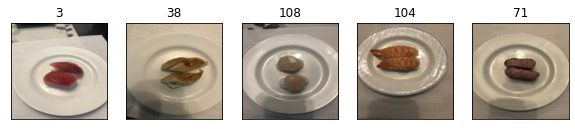

In [6]:
#結果出力

print('客: 注文は以上です. 以下がお客様の注文リストと店側から提供された寿司になります.')
print(save_order_list)

row=1 # 行数
col=len(serve_list) # 列数
fig, ax = plt.subplots(nrows=row, ncols=col,figsize=(10,6))

#fig.suptitle("serve_susi", fontsize=15, color='black')
for i,num in enumerate(serve_list):
  ax[i].set_title(str(num), fontsize=12, color='black')
  ax[i].axes.xaxis.set_visible(False) # X軸を非表示に
  ax[i].axes.yaxis.set_visible(False) # Y軸を非表示に
  im = imread('folder/'+ str(num) +'.jpg')  
  ax[i].imshow(im) # 画像を表示